# Import Libraries  (ANN with Tensorflow)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam

In [5]:
tf.__version__

'2.9.1'

# Load dataset and quick checks performed

In [6]:
df = pd.read_csv('../My_DATASET/Churn_Modelling.csv')

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

# Perform EDA on this dataset

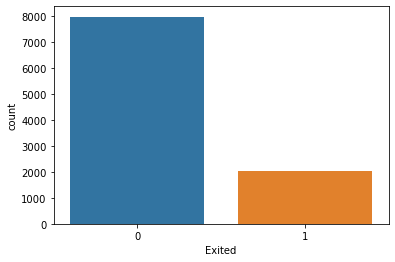

In [12]:
sns.countplot(x= df['Exited']);

# creating features and labels plus onehot encoding the categorical variables

In [13]:
X = pd.get_dummies(df.drop(df[['Exited','RowNumber', 'CustomerId', 'Surname']], axis=1),drop_first=True) 
y = df['Exited']

In [14]:
X # the encoding works correctly

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


# Perform train_test_split of the data

In [82]:
from sklearn.model_selection import train_test_split 

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform data scalling

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()

In [86]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [87]:
scaled_X_train.shape

(8000, 11)

In [133]:
model = Sequential()
model.add(Dense(60, input_dim=11, activation = 'relu'))
model.add(Dense(60, input_dim=60, activation = 'relu'))
model.add(Dense(60, input_dim=60, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [134]:
keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.99, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [135]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 60)                720       
                                                                 
 dense_5 (Dense)             (None, 60)                3660      
                                                                 
 dense_6 (Dense)             (None, 60)                3660      
                                                                 
 dense_7 (Dense)             (None, 1)                 61        
                                                                 
Total params: 8,101
Trainable params: 8,101
Non-trainable params: 0
_________________________________________________________________


In [52]:
#manual_weights = {0: 1, 1: 1.5} 

In [136]:
sklearn_weights = class_weight.compute_class_weight(f"balanced", np.unique(y_train), y_train)
sklearn_weights

array([0.6281407 , 2.45098039])

In [137]:
# transform array to dictionary that is imputed in keras
sklearn_weights = dict(enumerate(sklearn_weights))
sklearn_weights

{0: 0.628140703517588, 1: 2.450980392156863}

In [138]:
model.fit(scaled_X_train, y_train, epochs=30, batch_size=20, validation_split=0.1, validation_data=None,verbose=1, class_weight=sklearn_weights)

Epoch 1/30
360/360 [==============================] - 2s 4ms/step - loss: 0.5753 - accuracy: 0.6972 - val_loss: 0.4132 - val_accuracy: 0.8188
Epoch 2/30
360/360 [==============================] - 1s 3ms/step - loss: 0.4865 - accuracy: 0.7619 - val_loss: 0.3855 - val_accuracy: 0.8288
Epoch 3/30
360/360 [==============================] - 1s 2ms/step - loss: 0.4672 - accuracy: 0.7750 - val_loss: 0.4484 - val_accuracy: 0.7975
Epoch 4/30
360/360 [==============================] - 1s 3ms/step - loss: 0.4601 - accuracy: 0.7864 - val_loss: 0.4477 - val_accuracy: 0.7887
Epoch 5/30
360/360 [==============================] - 1s 2ms/step - loss: 0.4500 - accuracy: 0.7900 - val_loss: 0.4238 - val_accuracy: 0.8037
Epoch 6/30
360/360 [==============================] - 1s 3ms/step - loss: 0.4431 - accuracy: 0.8001 - val_loss: 0.3795 - val_accuracy: 0.8338
Epoch 7/30
360/360 [==============================] - 1s 3ms/step - loss: 0.4383 - accuracy: 0.7987 - val_loss: 0.4146 - val_accuracy: 0.8163
Epoch 

In [129]:
keras.backend.clear_session()

In [139]:
pred_Exited = model.predict(scaled_X_test)>0.5  # >0.5 is the argument to return True or False boolean instead of probalities

63/63 [==============================] - 0s 2ms/step


In [140]:
pred_Exited

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [41]:
# extract the predicted probabilities

#pred_Exited1 = pred_Exited.flatten().round(0)
 

# extract the predicted class labels
#pred_Exited2 = np.where(pred_Exited1 > 0.5, 1, 0) 


In [42]:
#pred_Exited1

In [43]:
#pred_Exited2

In [141]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [142]:
confusion_matrix(y_test,pred_Exited)

array([[1288,  307],
       [ 127,  278]], dtype=int64)

In [143]:
print(classification_report(y_test,pred_Exited))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1595
           1       0.48      0.69      0.56       405

    accuracy                           0.78      2000
   macro avg       0.69      0.75      0.71      2000
weighted avg       0.82      0.78      0.80      2000



# Trial prediction

In [144]:
#Geography: France, Credit score: 600, Gender: Male, Age: 40 years old, Tenure 3 years, balance: $6000, N. of pdt: 2, 
#credit card?: yes, Active customer?: yes, Estimated salary: 5000. will he leave the bank?
Trial_pred_Exited1 = model.predict(scaler.transform([[0, 0, 600, 1, 40, 3, 6000, 2, 1, 1, 5000]]))>0.5

1/1 [==============================] - 0s 35ms/step


In [145]:
Trial_pred_Exited1 # False: customer will not leave the bank

array([[False]])

In [146]:
Trial_pred_Exited2 = model.predict(scaler.transform([[0, 1,850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.10]]))>0.5

1/1 [==============================] - 0s 30ms/step


In [147]:
Trial_pred_Exited2

array([[False]])